### scQuint Differential Splicing

In [1]:
##Differential intron splicing analysis using scQuint. Scripts by Gonzalo Benegas and Derek Bogdanoff

In [2]:
!date

Tue Jan  3 17:39:13 PST 2023


In [3]:
!echo $CONDA_PREFIX

/c4/home/derek/miniconda3/envs/scquint


In [4]:
#analysis approach from:
#https://github.com/songlab-cal/scquint/blob/main/differential_splicing_example.ipynb

In [5]:
import anndata

import pandas as pd
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from scquint.differential_splicing import run_differential_splicing
from scquint.data import calculate_PSI

In [7]:
from scquint.data import calculate_PSI
from scquint.differential_splicing import run_differential_splicing, run_differential_splicing_for_each_group, find_marker_introns, mask_PSI
from scquint.dimensionality_reduction.pca import run_pca

In [8]:
input_dir = output_dir= '/c4/home/derek/data1/derek/data_scSLR/PBMC/'

In [9]:
adata_spl = sc.read_h5ad(input_dir+'spl_3prime_splice_acceptor.h5ad')

In [ ]:
calculate_PSI(

In [10]:
adata_exp = sc.read_h5ad(input_dir+'gene_expression.h5ad')

In [11]:
groupby = "ct2"
adata_exp.obs[groupby].value_counts()

cM               6218
T4_Naive         2526
T8_Mem           2162
T4_Mem           2139
B_Naive          1436
ncM              1162
NK_CD16+         1025
T8_Naive          752
NKT               505
T4_Treg           352
Tgd_1             280
Tgd_2             247
cDC_2             245
B_Mem_Prolif      203
B_Mem             202
T4_Mem_Prolif     168
B_Preplasma       166
T_NK_Prolif       154
T8_Mem_Prolif     140
PB                135
T8_MAIT           132
NK_Prolif          62
NK_CD56++          62
PB_Prolif          51
Progen_MEP         48
pDC                45
Progen_CMP         40
cDC_1              13
Progen_MPP          2
Progen_CLP          1
Name: ct2, dtype: int64

In [12]:
[i for i in adata_exp.var_names if i.startswith('CD45')]

['CD45RA_p', 'CD45RO_p']

/c4/home/derek/miniconda3/envs/scquint/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1092: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/c4/home/derek/miniconda3/envs/scquint/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1092: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


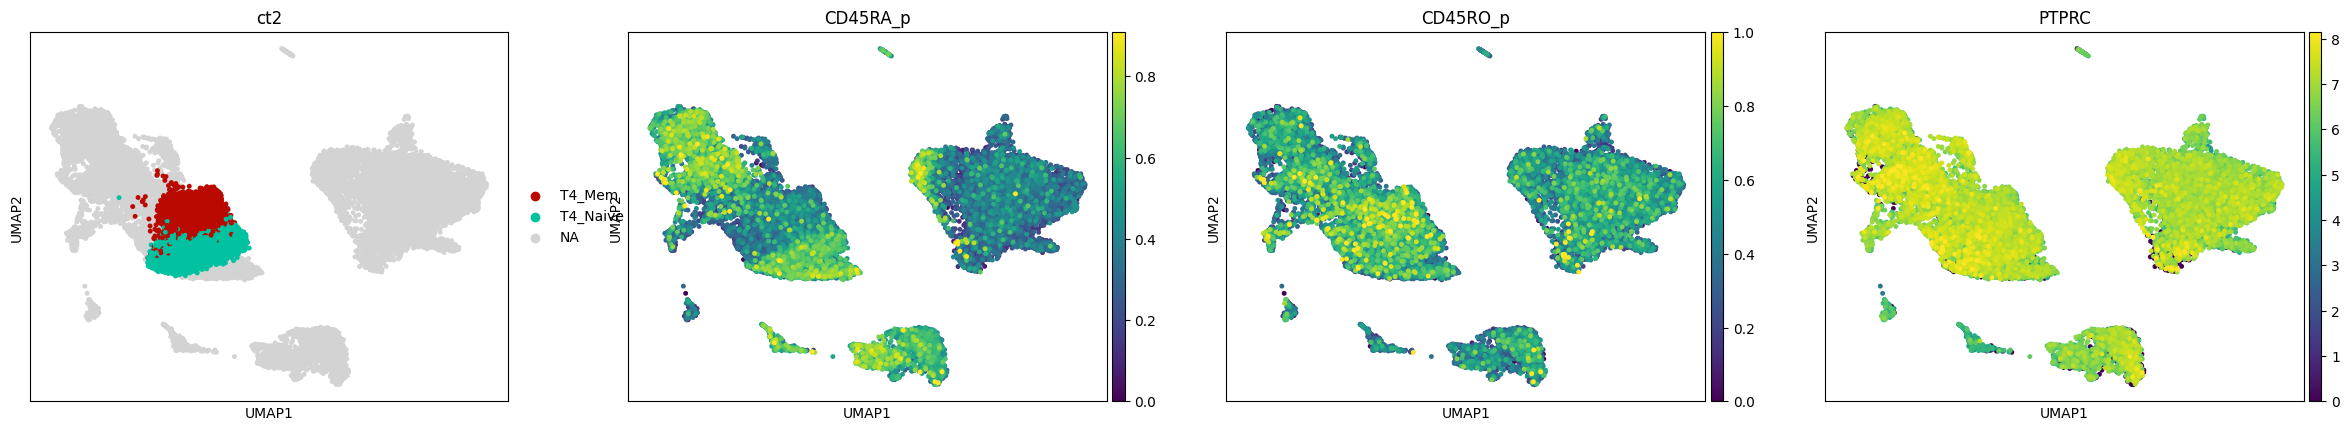

In [13]:
sc.pl.umap(adata_exp,
           color=['ct2','CD45RA_p','CD45RO_p','PTPRC'],
           groups=['T4_Mem','T4_Naive'],
           vmax='p99.9',
           size=50,
           ncols=4,
          )
       

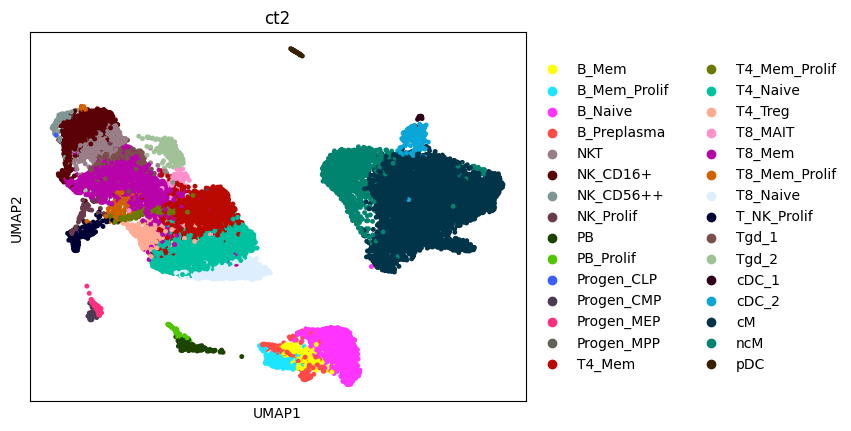

In [17]:
sc.pl.umap(adata_exp,
           color=['ct2'],
        #   groups=['T4_Mem','T4_Naive'],
           vmax='p99.9',
           size=50,
           ncols=4
          )

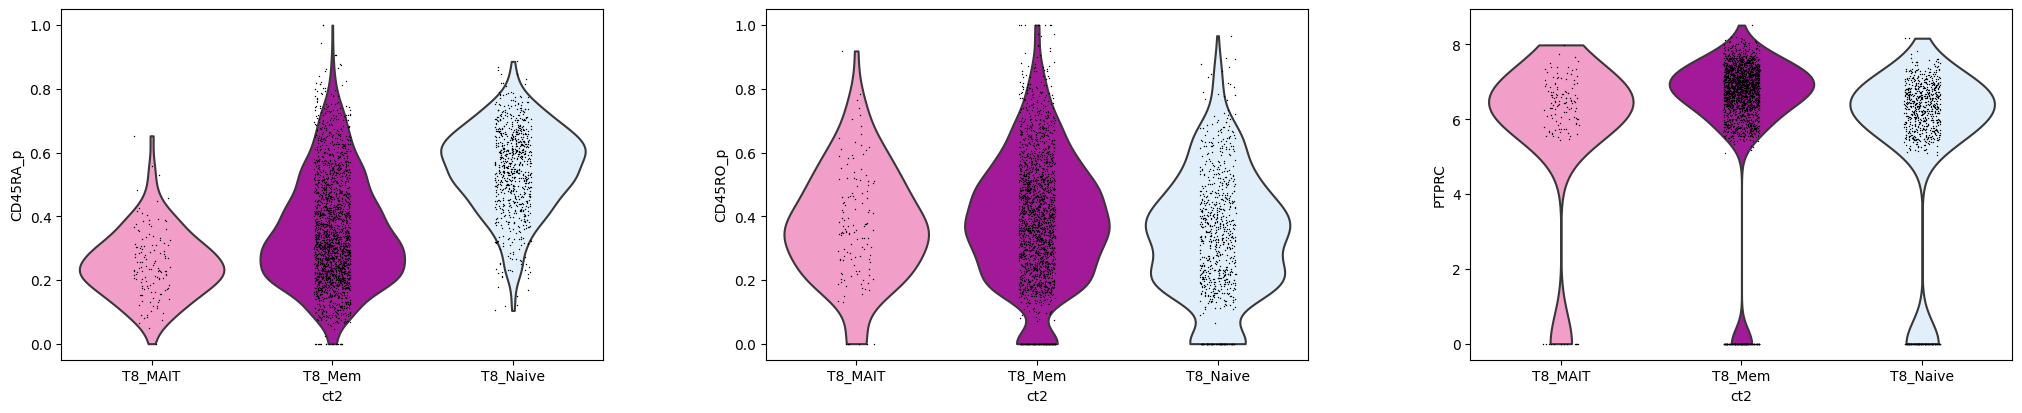

In [18]:
sc.pl.violin(adata_exp[adata_exp.obs['ct2'].isin(['T8_Mem','T8_Naive','T8_MAIT'])],
             keys=['CD45RA_p','CD45RO_p','PTPRC'],
             groupby='ct2'
            )

In [20]:
adata_spl.layers["PSI_raw"] = calculate_PSI(adata_spl)

/c4/home/derek/miniconda3/envs/scquint/lib/python3.10/site-packages/scquint/data.py:203: RuntimeWarning: invalid value encountered in divide
  return X / intron_group_sums[:,groups]


/c4/home/derek/miniconda3/envs/scquint/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


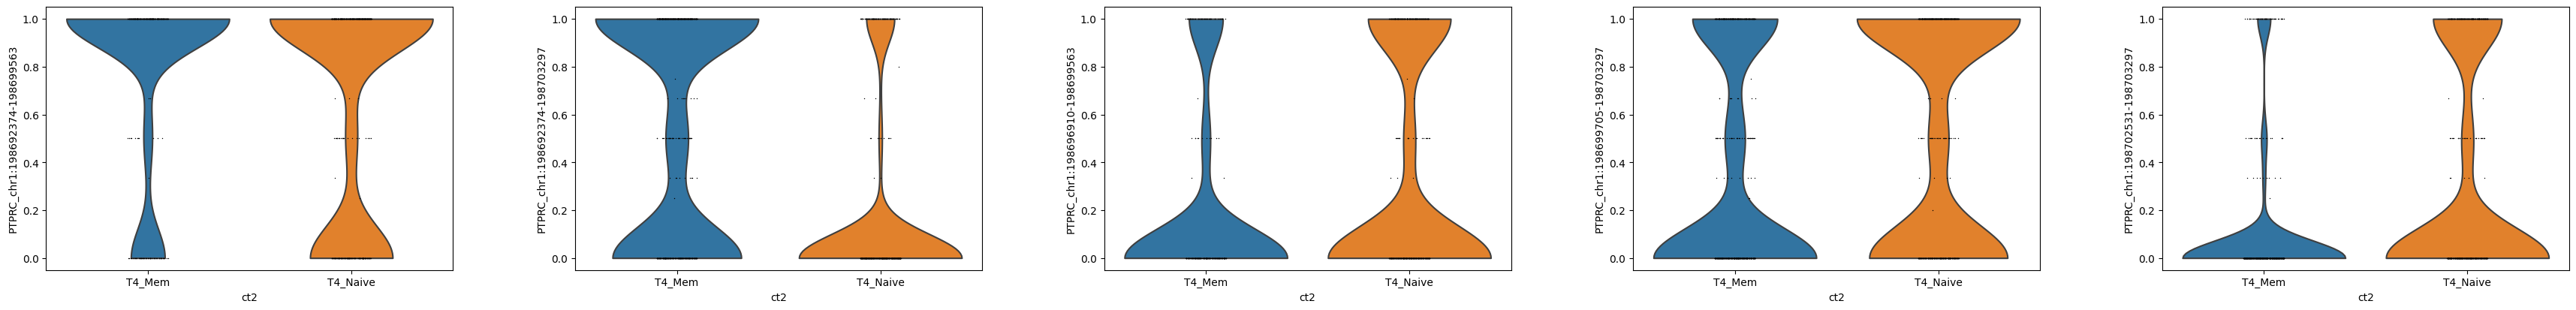

In [21]:
sc.pl.violin(adata_spl[adata_spl.obs['ct2'].isin(['T4_Mem','T4_Naive'])],
             keys=['PTPRC_chr1:198692374-198699563',
                 'PTPRC_chr1:198692374-198703297',
                 'PTPRC_chr1:198696910-198699563',
                 'PTPRC_chr1:198699705-198703297',
                 'PTPRC_chr1:198702531-198703297'],
             groupby='ct2',
             layer='PSI_raw'
            )

In [22]:
#groups_test = adata_spl.obs[groupby].value_counts()[:14].index.values.astype(str).tolist()[:9]

In [23]:
groups_test = ['T4_Mem','T4_Naive']

In [24]:
%%time


diff_spl_intron_groups, diff_spl_introns = run_differential_splicing_for_each_group(
    adata_spl, 
    groupby, 
    groups=groups_test,
    subset_to_groups=True,
    min_cells_per_intron_group=50, 
    min_total_cells_per_intron=50, 
    n_jobs=-1,
)

T4_Mem
sample sizes:  2139 2526
(4665, 3282)
filter_min_cells_per_feature
filter_singletons
(4665, 889)
filter_min_global_proportion
filter_singletons
(4665, 888)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(4665, 872)
Number of intron groups:  413
Number of introns:  872


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 413/413 [01:45<00:00,  3.92it/s]


T4_Naive
sample sizes:  2526 2139
(4665, 3282)
filter_min_cells_per_feature
filter_singletons
(4665, 889)
filter_min_global_proportion
filter_singletons
(4665, 888)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(4665, 872)
Number of intron groups:  413
Number of introns:  872


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 413/413 [00:01<00:00, 391.72it/s]


CPU times: user 4.98 s, sys: 7.11 s, total: 12.1 s
Wall time: 1min 52s


In [26]:
diff_spl_intron_groups.head()

,p_value,ll_null,ll,n_classes,gene_id,gene_name,max_abs_delta_psi,max_abs_lfc_psi,ranking,p_value_adj,test_group,name
0,6.227473e-61,-1498.594462415786,-1359.9657424227555,3,ENSG00000081237,PTPRC,0.391761,1.824351,0,2.571946e-58,T4_Mem,PTPRC_chr1_198703297_+
1,5.005155e-34,-502.5575547402807,-428.6108183899521,2,ENSG00000075884,ARHGAP15,0.489432,1.762743,1,1.033565e-31,T4_Mem,ARHGAP15_chr2_143250510_+
2,9.097105e-17,-1892.6701226828852,-1858.0920779231897,2,ENSG00000227507,LTB,0.134729,0.557860,2,1.252368e-14,T4_Mem,LTB_chr6_31581631_-
3,1.275681e-10,-3263.8425267850103,-3243.1698020058784,2,ENSG00000138326,RPS24,0.075487,0.306037,3,1.317140e-08,T4_Mem,RPS24_chr10_78040614_+
4,1.561187e-08,-340.23400275268887,-322.25876815340575,3,ENSG00000172183,ISG20,0.273075,1.670849,4,1.289540e-06,T4_Mem,ISG20_chr15_88639342_+


In [27]:
sig_diff_spl_intron_groups = diff_spl_intron_groups.query('p_value_adj < 0.05 and max_abs_delta_psi > 0.05')

sig_diff_spl_intron_groups.shape

(34, 12)

In [28]:
sig_diff_spl_intron_groups.gene_name.nunique()

16

In [29]:
diff_spl_introns[diff_spl_introns.intron_group.isin(sig_diff_spl_intron_groups.name)].shape

(72, 22)

In [30]:
marker_introns = find_marker_introns(
    sig_diff_spl_intron_groups, diff_spl_introns, 10, min_delta_psi=0.3,
)
marker_introns = {c: marker_introns[c] for c in groups_test} # just reordering
marker_introns

{'T4_Mem': ['PTPRC_chr1:198692374-198703297'],
 'T4_Naive': ['ARHGAP15_chr2:143228669-143250510']}

/c4/home/derek/miniconda3/envs/scquint/lib/python3.10/site-packages/scanpy/plotting/_matrixplot.py:222: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  __ = ax.pcolor(_color_df, **kwds)


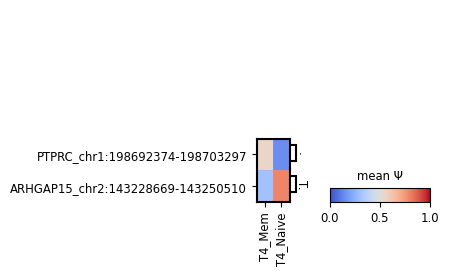

In [31]:
sc.pl.matrixplot(
    mask_PSI(adata_spl[adata_spl.obs[groupby].isin(groups_test)], 
             marker_introns, 
             groupby, min_cells=5),
    marker_introns,
    groupby, 
    cmap='coolwarm',
    categories_order=groups_test,
    swap_axes=True,
    layer="PSI_raw_masked", 
    colorbar_title="mean Ψ",
    vmin=0, vmax=1,
    dendrogram=False,
)


In [32]:
sum(find_marker_introns(diff_spl_intron_groups, diff_spl_introns, 3, min_delta_psi=0.5).values(), [])

[]

In [33]:
[i for i in adata_spl.var_names if i.startswith('PTPRC')]

['PTPRC_chr1:198692374-198699563',
 'PTPRC_chr1:198692374-198703297',
 'PTPRC_chr1:198696910-198699563',
 'PTPRC_chr1:198699705-198703297',
 'PTPRC_chr1:198702531-198703297']

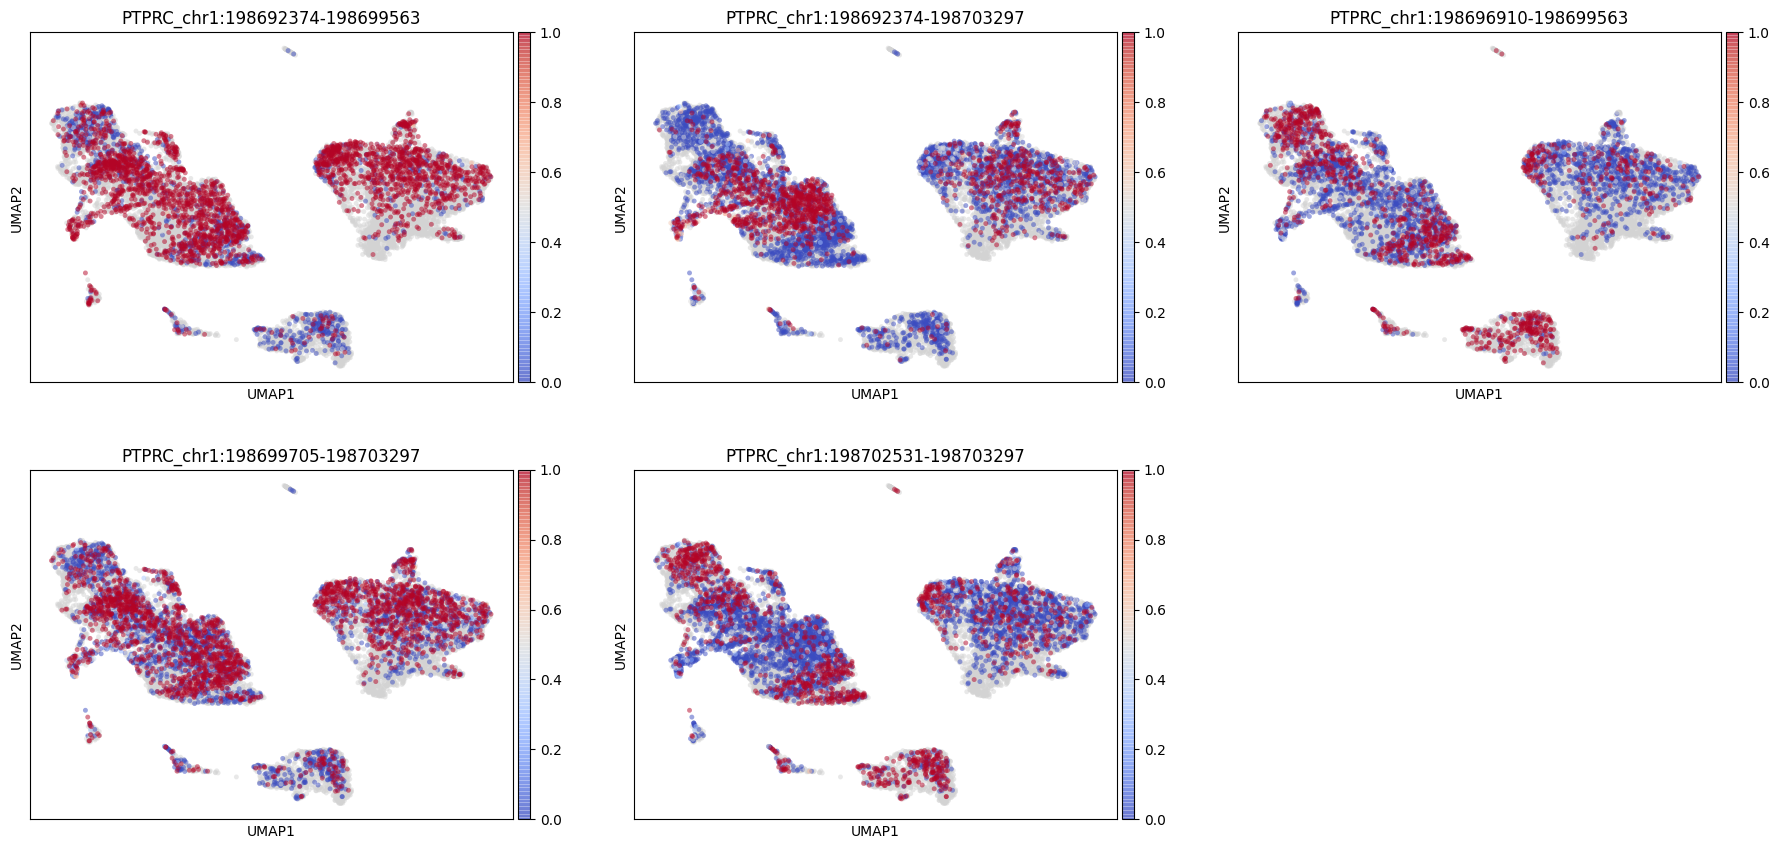

In [34]:
sc.pl.umap(
    adata_spl,
    color=[i for i in adata_spl.var_names if i.startswith('PTPRC')],
    cmap='coolwarm',
    layer="PSI_raw", 
    vmin=0, vmax=1, ncols=3, size=50, alpha=0.5,

)


### sashimi tracks

In [35]:
import os
from pybiomart import Dataset
from pygenometracks import tracks
from IPython.display import Image

In [36]:
os.makedirs('./sashimi_plots', exist_ok=True)

In [37]:
sashimi_introns = diff_spl_introns[diff_spl_introns['gene_name'] == "PTPRC"]

In [38]:
sashimi_introns

,chromosome,start,end,strand,intron_motif,n_cells,gene_id_start,gene_id_end,n_genes,gene_id,...,intron_group_size,n_genes_per_intron_group,psi_a,psi_b,delta_psi,lfc_psi,abs_delta_psi,abs_lfc_psi,test_group,name
72,chr1,198692374,198699563,+,1,2666,ENSG00000081237,ENSG00000081237,1,ENSG00000081237,...,2,1,0.808434,0.656386,0.152049,0.300587,0.152049,0.300587,T4_Mem,PTPRC_chr1:198692374-198699563
73,chr1,198696910,198699563,+,1,1349,ENSG00000081237,ENSG00000081237,1,ENSG00000081237,...,2,1,0.191566,0.343614,-0.152049,-0.842950,0.152049,0.842950,T4_Mem,PTPRC_chr1:198696910-198699563
74,chr1,198692374,198703297,+,1,1654,ENSG00000081237,ENSG00000081237,1,ENSG00000081237,...,3,1,0.545908,0.154147,0.391761,1.824351,0.391761,1.824351,T4_Mem,PTPRC_chr1:198692374-198703297
75,chr1,198699705,198703297,+,1,2648,ENSG00000081237,ENSG00000081237,1,ENSG00000081237,...,3,1,0.359091,0.536921,-0.177830,-0.580361,0.177830,0.580361,T4_Mem,PTPRC_chr1:198699705-198703297
76,chr1,198702531,198703297,+,1,1565,ENSG00000081237,ENSG00000081237,1,ENSG00000081237,...,3,1,0.095001,0.308932,-0.213931,-1.701276,0.213931,1.701276,T4_Mem,PTPRC_chr1:198702531-198703297
944,chr1,198692374,198699563,+,1,2666,ENSG00000081237,ENSG00000081237,1,ENSG00000081237,...,2,1,0.656385,0.808435,-0.152049,-0.300588,0.152049,0.300588,T4_Naive,PTPRC_chr1:198692374-198699563
945,chr1,198696910,198699563,+,1,1349,ENSG00000081237,ENSG00000081237,1,ENSG00000081237,...,2,1,0.343615,0.191565,0.152049,0.842955,0.152049,0.842955,T4_Naive,PTPRC_chr1:198696910-198699563
946,chr1,198692374,198703297,+,1,1654,ENSG00000081237,ENSG00000081237,1,ENSG00000081237,...,3,1,0.154147,0.545908,-0.391761,-1.824351,0.391761,1.824351,T4_Naive,PTPRC_chr1:198692374-198703297
947,chr1,198699705,198703297,+,1,2648,ENSG00000081237,ENSG00000081237,1,ENSG00000081237,...,3,1,0.536921,0.359091,0.177830,0.580361,0.177830,0.580361,T4_Naive,PTPRC_chr1:198699705-198703297
948,chr1,198702531,198703297,+,1,1565,ENSG00000081237,ENSG00000081237,1,ENSG00000081237,...,3,1,0.308932,0.095001,0.213931,1.701275,0.213931,1.701275,T4_Naive,PTPRC_chr1:198702531-198703297


In [39]:
groups_test

['T4_Mem', 'T4_Naive']

In [40]:
sashimi_introns

,chromosome,start,end,strand,intron_motif,n_cells,gene_id_start,gene_id_end,n_genes,gene_id,...,intron_group_size,n_genes_per_intron_group,psi_a,psi_b,delta_psi,lfc_psi,abs_delta_psi,abs_lfc_psi,test_group,name
72,chr1,198692374,198699563,+,1,2666,ENSG00000081237,ENSG00000081237,1,ENSG00000081237,...,2,1,0.808434,0.656386,0.152049,0.300587,0.152049,0.300587,T4_Mem,PTPRC_chr1:198692374-198699563
73,chr1,198696910,198699563,+,1,1349,ENSG00000081237,ENSG00000081237,1,ENSG00000081237,...,2,1,0.191566,0.343614,-0.152049,-0.842950,0.152049,0.842950,T4_Mem,PTPRC_chr1:198696910-198699563
74,chr1,198692374,198703297,+,1,1654,ENSG00000081237,ENSG00000081237,1,ENSG00000081237,...,3,1,0.545908,0.154147,0.391761,1.824351,0.391761,1.824351,T4_Mem,PTPRC_chr1:198692374-198703297
75,chr1,198699705,198703297,+,1,2648,ENSG00000081237,ENSG00000081237,1,ENSG00000081237,...,3,1,0.359091,0.536921,-0.177830,-0.580361,0.177830,0.580361,T4_Mem,PTPRC_chr1:198699705-198703297
76,chr1,198702531,198703297,+,1,1565,ENSG00000081237,ENSG00000081237,1,ENSG00000081237,...,3,1,0.095001,0.308932,-0.213931,-1.701276,0.213931,1.701276,T4_Mem,PTPRC_chr1:198702531-198703297
944,chr1,198692374,198699563,+,1,2666,ENSG00000081237,ENSG00000081237,1,ENSG00000081237,...,2,1,0.656385,0.808435,-0.152049,-0.300588,0.152049,0.300588,T4_Naive,PTPRC_chr1:198692374-198699563
945,chr1,198696910,198699563,+,1,1349,ENSG00000081237,ENSG00000081237,1,ENSG00000081237,...,2,1,0.343615,0.191565,0.152049,0.842955,0.152049,0.842955,T4_Naive,PTPRC_chr1:198696910-198699563
946,chr1,198692374,198703297,+,1,1654,ENSG00000081237,ENSG00000081237,1,ENSG00000081237,...,3,1,0.154147,0.545908,-0.391761,-1.824351,0.391761,1.824351,T4_Naive,PTPRC_chr1:198692374-198703297
947,chr1,198699705,198703297,+,1,2648,ENSG00000081237,ENSG00000081237,1,ENSG00000081237,...,3,1,0.536921,0.359091,0.177830,0.580361,0.177830,0.580361,T4_Naive,PTPRC_chr1:198699705-198703297
948,chr1,198702531,198703297,+,1,1565,ENSG00000081237,ENSG00000081237,1,ENSG00000081237,...,3,1,0.308932,0.095001,0.213931,1.701275,0.213931,1.701275,T4_Naive,PTPRC_chr1:198702531-198703297


In [42]:
link_files=[]

for name in groups_test:
    if name in sashimi_introns.test_group.unique():
        
        link_files.append(name)
        
        sashimi_introns_ = sashimi_introns[sashimi_introns.test_group == name]
        
        intron_groups = sashimi_introns_.intron_group.unique()
        
        f = open(f"./sashimi_plots/link_{name}.txt", "w")
        
        for group in intron_groups:
                
                number_introns = sashimi_introns_[sashimi_introns_.intron_group == group].intron_group_size.values[0]
        
                for intron in range(number_introns):
                    f.write(str(sashimi_introns_[sashimi_introns_.intron_group == group].iloc[[intron]]['chromosome'].values[0])+'\t'
                        +str(sashimi_introns_[sashimi_introns_.intron_group == group].iloc[[intron]]['start'].values[0])+'\t'
                        +str(sashimi_introns_[sashimi_introns_.intron_group == group].iloc[[intron]]['start'].values[0])+'\t'
                        +str(sashimi_introns_[sashimi_introns_.intron_group == group].iloc[[intron]]['chromosome'].values[0])+'\t'
                        +str(sashimi_introns_[sashimi_introns_.intron_group == group].iloc[[intron]]['end'].values[0])+'\t'
                        +str(sashimi_introns_[sashimi_introns_.intron_group == group].iloc[[intron]]['end'].values[0])+'\t'
                        +str(sashimi_introns_[sashimi_introns_.intron_group == group].iloc[[intron]]['psi_a'].values[0])+'\n'
                       )
        f.close()

In [43]:
for i in sashimi_introns_.intron_group.unique():
    print(i)

PTPRC_chr1_198699563_+
PTPRC_chr1_198703297_+


In [44]:
sashimi_introns_.iloc[[1]]

,chromosome,start,end,strand,intron_motif,n_cells,gene_id_start,gene_id_end,n_genes,gene_id,...,intron_group_size,n_genes_per_intron_group,psi_a,psi_b,delta_psi,lfc_psi,abs_delta_psi,abs_lfc_psi,test_group,name
945,chr1,198696910,198699563,+,1,1349,ENSG00000081237,ENSG00000081237,1,ENSG00000081237,...,2,1,0.343615,0.191565,0.152049,0.842955,0.152049,0.842955,T4_Naive,PTPRC_chr1:198696910-198699563


In [45]:
# sc.pl.umap(adata_spl,
#            color='ct2'
#           )

In [46]:
# adata_spl_1 = adata_spl[adata_spl.obs.batch == '22']
# adata_spl_2 = adata_spl[adata_spl.obs.batch == '23']

# adata_spl_1.obs_names = adata_spl_1.obs_names.str[:-5]
# adata_spl_2.obs_names = adata_spl_2.obs_names.str[:-5]

In [47]:
#adata_spl_2[adata_spl_2.obs['ct2'].isin(['T4_Mem','T4_Naive'])].obs['ct2'].to_csv('T4_subtypes.csv',header=None,sep='\t')

In [48]:
adata_spl[adata_spl.obs['ct2'].isin(['T4_Mem','T4_Naive'])].obs['ct2']

barcode_index
AAACCTGAGGTCGGAT-1-22      T4_Mem
AAACCTGAGTACGTTC-1-22      T4_Mem
AAACCTGAGTCGCCGT-1-22      T4_Mem
AAACCTGAGTTGTAGA-1-22      T4_Mem
AAACCTGCAACAACCT-1-22      T4_Mem
                           ...   
TTTGGTTTCCTTGACC-1-23      T4_Mem
TTTGTCAAGGGAGTAA-1-23    T4_Naive
TTTGTCAAGTCTCGGC-1-23    T4_Naive
TTTGTCACACCTGGTG-1-23    T4_Naive
TTTGTCAGTGTTGAGG-1-23    T4_Naive
Name: ct2, Length: 4665, dtype: category
Categories (2, object): ['T4_Mem', 'T4_Naive']

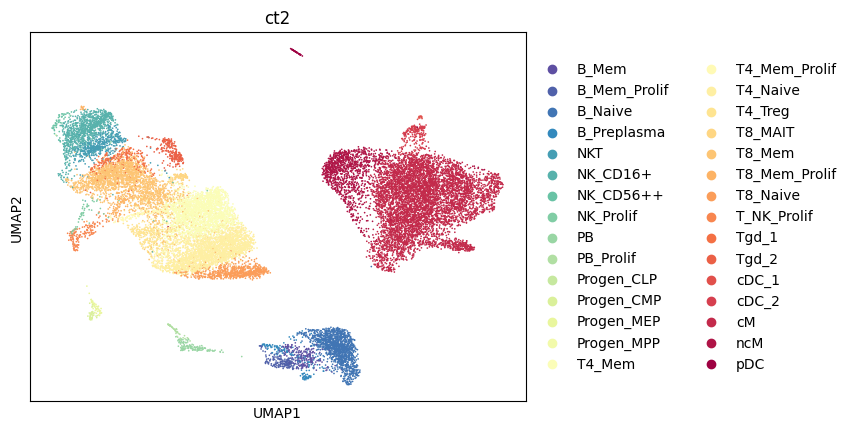

In [59]:
sc.pl.umap(adata_spl,
           color='ct2',
           palette='Spectral_r'
          )

In [52]:
colors = pd.DataFrame(adata_spl.uns['ct2_colors'],
             index=adata_spl.obs['ct2'].cat.categories,
             columns=['color']
        
            )

In [66]:
##write ini file


ini_file = """
[spacer]
height = 0.1
"""

bw_path = '/c4/home/derek/data1/derek/data_scSLR/PBMC/concat_BAMS/'

for name in link_files:

    ini_file = ini_file + f"""

[sashimi file test]
title = {name}
link_file = ./sashimi_plots/link_{name}.txt
# Path to bigwig file
bw_file = {bw_path}/{name}.bw
# Path to links file
height = 10
bw_color = {colors.loc[name]['color']}
number_of_bins = 20000
max_value = 1500
min_value = 0
nans_to_zeros = true
summary_method = mean
show_data_range = true
link_color ={colors.loc[name]['color']}
fontsize = 10
# The link in Sashimi plot is a Bezier curve.
# The height of the curve is calculated from the length of the intron.
# When the y-axis in bigwig track is different, the height of curve needs to be scaled.
# The line width for links is proportion to the numbers at the last column in links file (PSI).
# But the absolute width is calculated from the supplied numbers, which can look too thin or too wide sometimes.
# Use scale_line_width to scale the absolute line widths.
# You may need to try several values to get a satisfying result.
scale_link_height = 4
scale_line_width = 3
show_number = true
file_type = sashimiBigWig


"""

ini_file = ini_file + """
[spacer]
height = 1

[genes]
color = black  
file = /c4/home/derek/data1/HDD-2/derek/reference/refdata-gex-GRCh38-2020-A/genes/genes.gtf
height = 7
# title = gtf
# fontsize = 10
file_type = gtf
gene_rows = 10

"""
    
print(ini_file, file=open('./sashimi_plots/sashimi.ini','w'))


    


In [67]:
from pybiomart import Dataset

dataset = Dataset(name='hsapiens_gene_ensembl',
                  host='http://www.ensembl.org')

genes = dataset.query(attributes=['external_gene_name','chromosome_name','start_position','end_position'],
              )

In [68]:
genes[genes['Gene name'] == 'PTPRC']

,Gene name,Chromosome/scaffold name,Gene start (bp),Gene end (bp)
1900,PTPRC,CHR_HSCHR1_3_CTG31,198650158,198733963
68345,PTPRC,1,198638457,198757476


In [69]:
!pyGenomeTracks --tracks ./sashimi_plots/sashimi.ini --region 'chr1:198690000-198707476' -o ./sashimi_plots/sashimi_PTPRC.png


INFO:pygenometracks.tracksClass:initialize 1. [spacer]
INFO:pygenometracks.tracksClass:initialize 2. [sashimi file test]
100%|███████████████████████████████████████████| 5/5 [00:00<00:00, 4746.84it/s]
INFO:pygenometracks.tracksClass:initialize 3. [sashimi file test]
100%|███████████████████████████████████████████| 5/5 [00:00<00:00, 5745.62it/s]
INFO:pygenometracks.tracksClass:initialize 4. [spacer]
INFO:pygenometracks.tracksClass:initialize 5. [genes]
100%|██████████████████████████████████████████| 20/20 [00:00<00:00, 325.85it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:6.936031103134155
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 29.893617021276597. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [spacer]
INFO:pygenometracks.tracksClass:plotting 2. [sashimi file test]
DEBUG:pygenometracks.tracks.GenomeTrack:5 links plotted
INFO:pygenometracks.tracksClass:plotting 3. [sashimi file test]
DEBUG:pygenometr

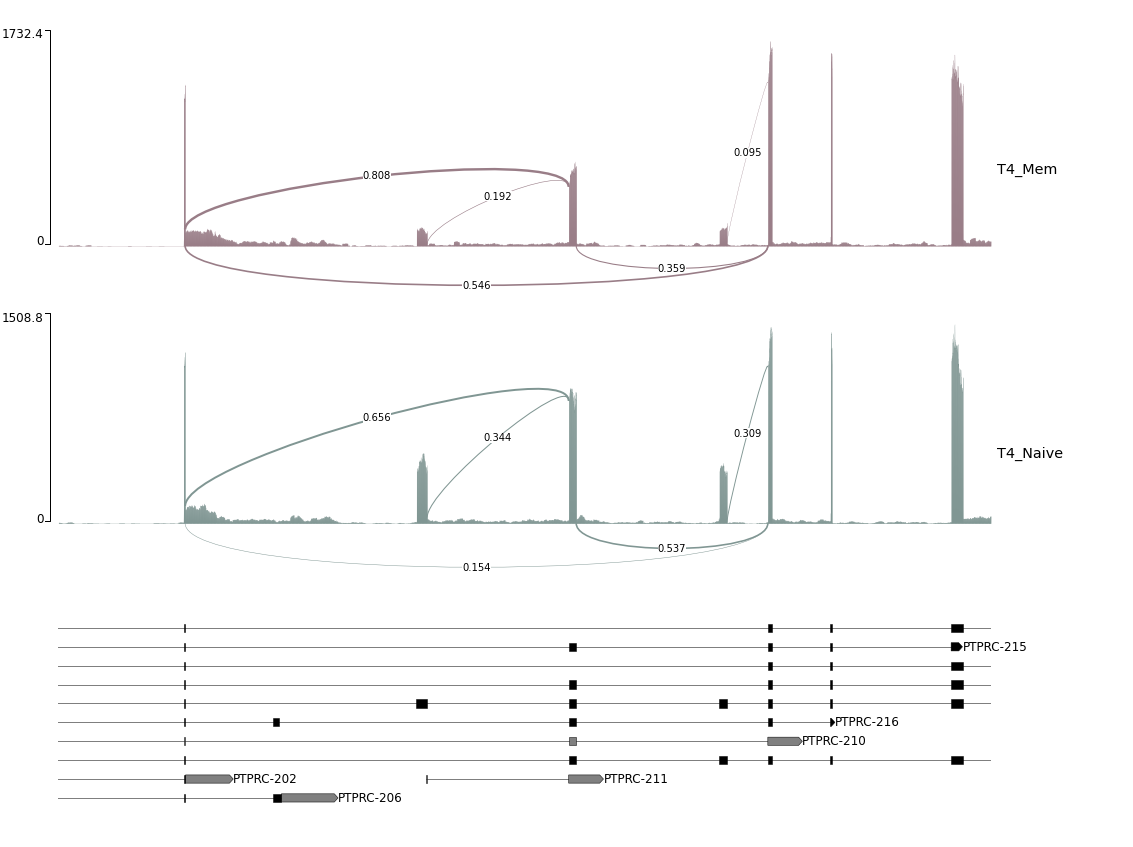

In [70]:
Image(filename='./sashimi_plots/sashimi_PTPRC.png',retina=False)

In [ ]:
!conda list